In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='t'>

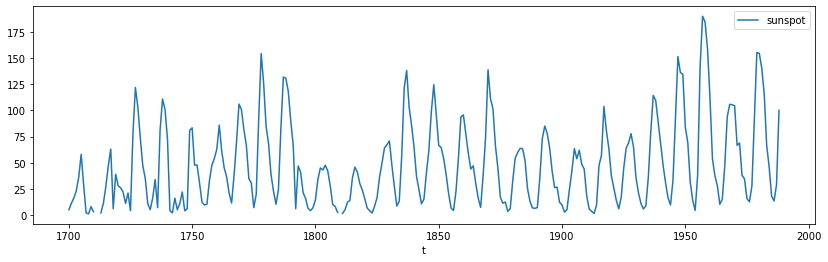

In [18]:
sunspot_year = pd.read_csv("Data/sunspot.year.csv", index_col="t")
sunspot_year.plot(y="sunspot", figsize=(14,4))

<AxesSubplot:xlabel='t'>

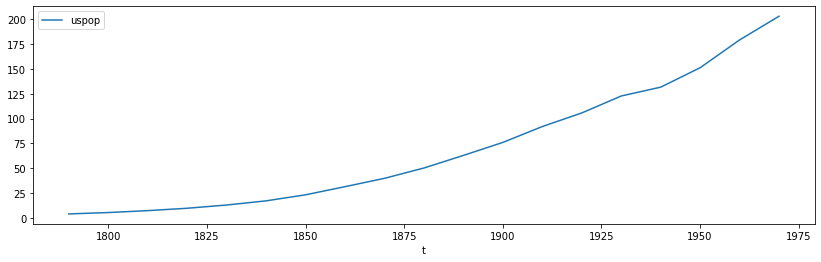

In [19]:
uspop = pd.read_csv("Data/uspop.csv", index_col="t")

uspop.plot(y="uspop", figsize=(14,4))

<AxesSubplot:xlabel='t'>

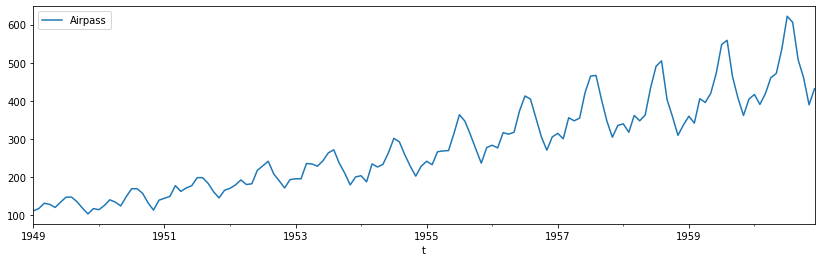

In [20]:
AirPassengers = pd.read_csv("Data/AirPassengers.csv", parse_dates=[0], dayfirst=True, index_col="t")
AirPassengers.plot(y="Airpass", figsize=(14,4))

In [21]:
x = AirPassengers
y = np.log(AirPassengers)

In [22]:
x

,Airpass
t,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [23]:
y


,Airpass
t,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


## 3. Découvrez des algorithmes de traitement des moyennes mobiles

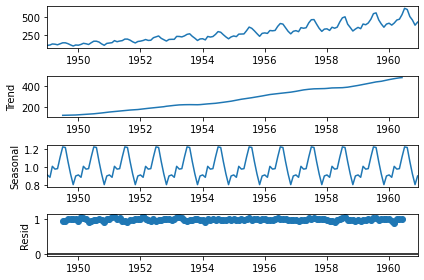

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_x = seasonal_decompose(x,  model='multiplicative')
decomp_x.plot()
plt.show()

## 4. TP : Prévoyez une série à l’aide des méthodes de lissage exponentiel

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing

In [26]:
les = ExponentialSmoothing(np.asarray(y['Airpass']), trend=None, seasonal=None).fit()

les.forecast(12)

C:\Users\utilisateur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


array([6.06842559, 6.06842559, 6.06842559, 6.06842559, 6.06842559,
       6.06842559, 6.06842559, 6.06842559, 6.06842559, 6.06842559,
       6.06842559, 6.06842559])

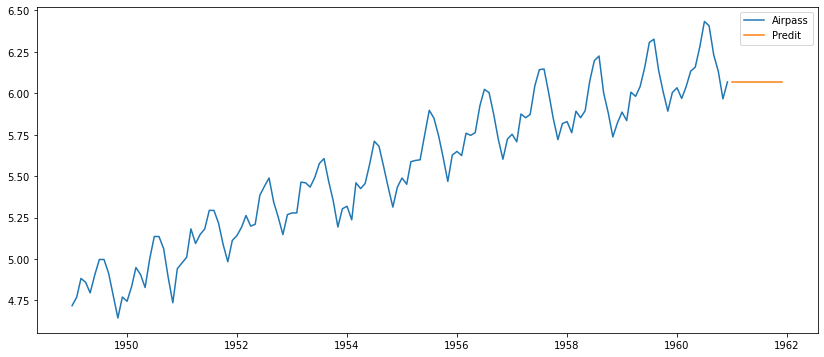

In [27]:
les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), les_pred, label='Predit')
plt.legend()
plt.show()

In [28]:
led = ExponentialSmoothing(np.asarray(y['Airpass']), trend='mul', seasonal=None).fit()
led_pred = led.forecast(12)

led_pred

C:\Users\utilisateur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


array([6.07731898, 6.08622541, 6.09514489, 6.10407745, 6.11302309,
       6.12198184, 6.13095373, 6.13993876, 6.14893696, 6.15794834,
       6.16697294, 6.17601076])

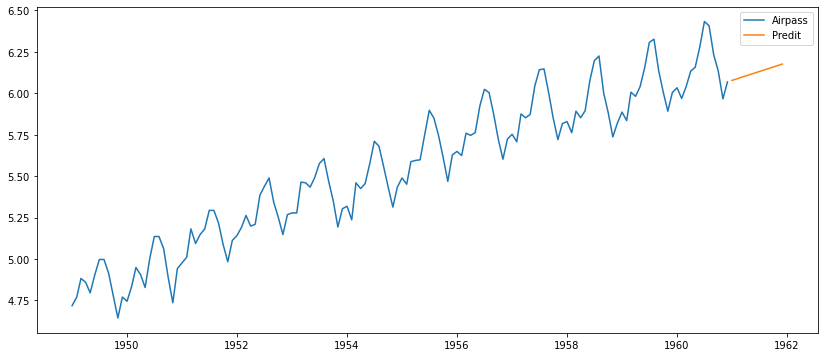

In [29]:
plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), led_pred, label='Predit')
plt.legend()
plt.show()

In [30]:
hw = ExponentialSmoothing(np.asarray(y['Airpass']), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

hw_pred

C:\Users\utilisateur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


array([6.11535563, 6.06372006, 6.20906734, 6.2510601 , 6.2839243 ,
       6.42867556, 6.57120396, 6.55901487, 6.37014684, 6.24444058,
       6.08777884, 6.20283202])

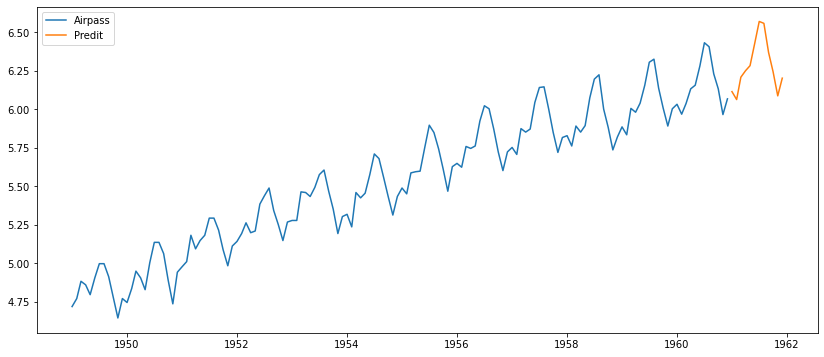

In [31]:
plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.show()

# 5. TP : Prévoyez une série temporelle à l’aide des méthodes SARIMA

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf
